In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pysal as ps
import mplleaflet
import zipfile #i am not giving it a name cause i intend to use it only once
from sklearn.cluster import k_means

In [2]:
geodata = gpd.read_file('nyc-zip-code-tabulation-areas-polygons.geojson')
geodata1 = gpd.read_file('nyc-zip-code-tabulation-areas-polygons.geojson')
geod = pd.DataFrame({'zip':geodata['postalCode'].astype(float)}).drop_duplicates()
#geod.head()



In [3]:
y = []
for i in range(1994,2014):
    #n= str(i)
    y.append(i)

In [4]:
l = []
for i in range(20):
    n='df'+str(i)
    l.append(n)

In [5]:
k=0
for i in range(94,100):
        if k<6:
            
            fname = 'zbp'+str(i)+'totals.zip'
            zf = zipfile.ZipFile(fname)
            name = 'df'+str(k)
            #l_z = zf.namelist()
            #print l and see which file to open
            our_text_file = zf.open('zbp'+str(i)+'totals.txt')
            globals()[name] = pd.read_csv(our_text_file)
            
            k=k+1
            
    
for i in range(0,11):
         if k>=6 and k<16:   
            #print i
            fname = 'zbp0'+str(i)+'totals.zip'
            zf = zipfile.ZipFile(fname)
            #l_z = zf.namelist()
            #print l and see which file to open
            name = 'df'+str(k)
            our_text_file = zf.open('zbp0'+str(i)+'totals.txt')
            globals()[name] = pd.read_csv(our_text_file)
            k=k+1
            #print k
    
for i in range(0,4):
        if k>=16:
            fname = 'zbp1'+str(i)+'totals.zip'
            zf = zipfile.ZipFile(fname)
            #l_z = zf.namelist()
            #print l and see which file to open
            name = 'df'+str(k)
            our_text_file = zf.open('zbp1'+str(i)+'totals.txt')
            globals()[name] = pd.read_csv(our_text_file)
            
            k=k+1
        

In [8]:
data_f = geod

In [9]:

for i in range(20):
    
    name = 'data'+str(i)
    name_c = 'df'+str(i)
    df = globals()[name_c]
    if (i>3) and (i<9):
        #print i 
        
        df = df[['ZIP','EST']]
        df.columns = ['zip','est'+str(i)]
        df = pd.merge(geod,df,on='zip')
    else :
        df = df[['zip','est']]
        df.columns = ['zip','est'+str(i)]
        df = pd.merge(geod,df,on='zip')
    globals()[name] = df
    data_f['est'+str(i)] = df['est'+str(i)]
    #temp = df['est'+str(i)]
    #data_f = pd.mer(data0['zip'],temp)
# df13_ = df13[['zip','est']]
# data13 = df13_.as_matrix()


In [10]:
np.shape(data_f)

(247, 21)

In [11]:
data_f

,zip,est0,est1,est2,est3,est4,est5,est6,est7,est8,...,est10,est11,est12,est13,est14,est15,est16,est17,est18,est19
0,11372,1229,1236,1292,1309,1351,1376,1409,1408,1463,...,1554,1539,1527,1545,1538,1572,1629,1647,1724,1759
1,11004,194,188,176,192,194,186,189,204,214,...,226,225,226,238,227,233,229,222,241,241
2,11040,1422,1414,1335,1344,1344,1350,1350,1341,1398,...,1406,1441,1454,1488,1503,1475,1494,1488,1510,1539
3,11426,326,219,209,198,203,217,213,217,207,...,221,226,226,228,226,237,248,256,266,258
4,11365,492,476,483,522,509,519,553,574,574,...,599,604,608,617,616,628,643,677,679,714
5,11373,1147,1172,1161,1189,1248,1242,1244,1259,1328,...,1418,1434,1442,1416,1460,1450,1498,1523,1554,1640
6,11001,669,669,656,641,644,635,651,661,641,...,670,685,690,681,682,681,690,714,714,718
7,11375,1868,1925,1957,1926,1949,1975,1960,1964,1962,...,2010,2057,2046,2064,2034,2052,2060,2102,2078,2124
8,11427,170,172,176,187,192,203,210,186,200,...,224,230,223,220,222,219,237,248,245,259
9,11374,830,831,839,833,869,897,923,936,994,...,1051,1093,1086,1072,1057,1086,1089,1108,1081,1119


In [12]:
df_array = data_f.as_matrix()

In [13]:
df_array

array([[ 11372.,   1229.,   1236., ...,   1647.,   1724.,   1759.],
       [ 11004.,    194.,    188., ...,    222.,    241.,    241.],
       [ 11040.,   1422.,   1414., ...,   1488.,   1510.,   1539.],
       ..., 
       [ 10069.,     nan,     nan, ...,     nan,     nan,     nan],
       [ 10281.,     nan,     nan, ...,     nan,     nan,     nan],
       [ 10282.,     nan,     nan, ...,     nan,     nan,     nan]])

In [14]:
badindex = []
for i,est in enumerate(df_array):
    if np.isnan(est).any():
        badindex.append(i)
        
clean_est = np.delete(df_array, badindex, 0)

In [15]:
np.shape(clean_est)

(224L, 21L)

([<matplotlib.axis.XTick at 0x2af714e0>,
 <a list of 20 Text xticklabel objects>)

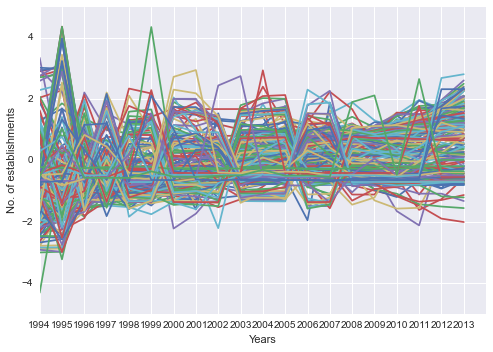

In [16]:
cluster_array = []
zips = []
s = []
for i in range(224):
    nd = clean_est[i][1:]
    zips.append(clean_est[i][0])
    s.append(nd)
    nd_mean = np.mean(clean_est[i][1:])
    nd_std = np.std(clean_est[i][1:])
    for i in range(len(nd)):
        nd[i] = (nd[i]-nd_mean)/nd_std
    plt.plot(range(20),nd)
    cluster_array.append(nd)
    clean_est[i][1:] = nd   
plt.xlabel('Years')
plt.ylabel('No. of establishments')
plt.xticks(range(20),y)

C:\Users\priya\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


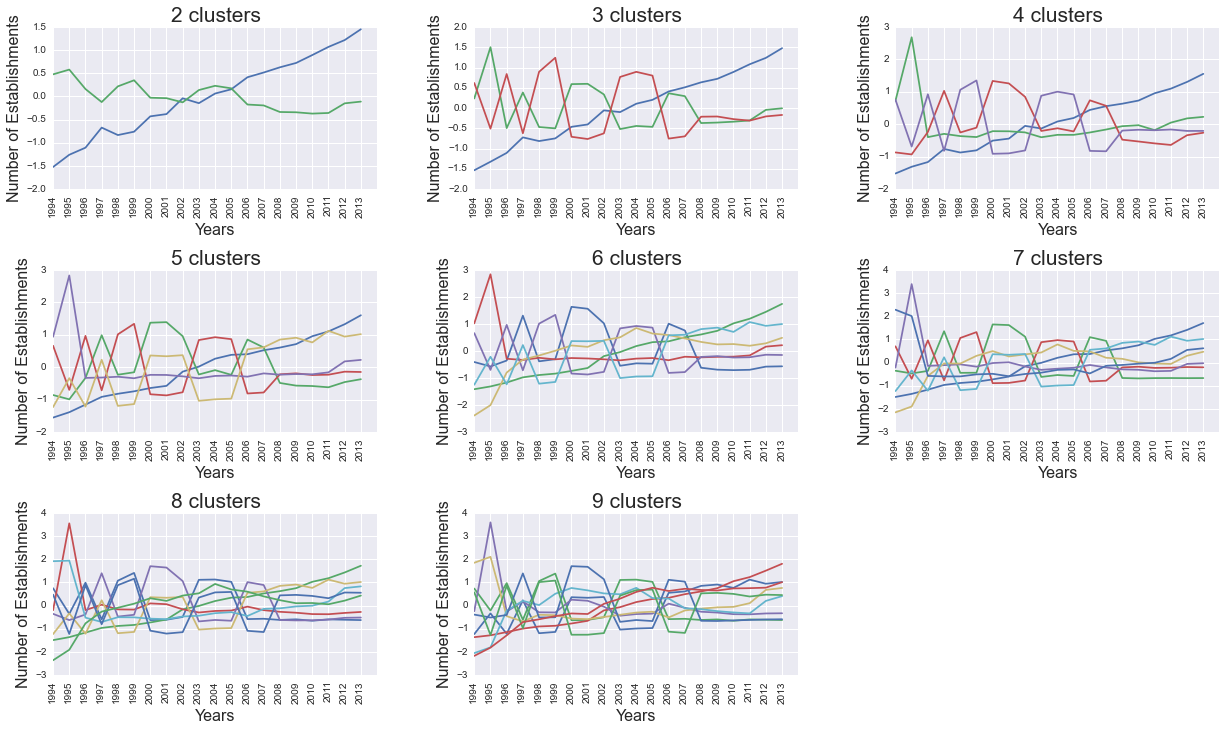

In [17]:
from sklearn.cluster import k_means
plt.figure(figsize=(18, 18), dpi=200)

p = 1
for i in range(2,10):

    est=k_means(s,n_clusters = i)
    plt.subplot(3, 3, p)
    p += 1
    plt.plot(range(20), np.transpose(est[0]))
    plt.title(str(i)+' clusters', fontsize = 21)
    plt.ylabel('Number of Establishments', fontsize = 16)
    plt.xlabel('Years', fontsize = 16)
    plt.xticks(range(20), y, rotation = 90);
    plt.legend()
plt.subplots_adjust(wspace=.3, hspace=0.5, left=0, right=0.9, top=0.5, bottom=0)

In [18]:
with_zip=pd.DataFrame()
with_zip['zip'] = zips

[1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 3 1 1 1 1 3 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 2 2 1 1 3 1 2 3 2
 2 1 2 1 1 2 2 3 1 1 2 2 3 1 3 2 1 0 4 0 4 1 1 4 0 4 4 1 2 0 4 0 4 0 0 4 4
 2 4 2 0 4 0 4 4 2 0 1 4 0 4 0 4 0 1 4 0 4 4 0 0 3 2 0 3 2 0 3 0 3 0 3 3 3
 2 2 0 3 3 0 4 2 0 3 2 2 0 3 2 0 2 0 3 2 0 3 3 4 0 2 2 0 3 3 3 2 0 0 0 3 2
 3 4]


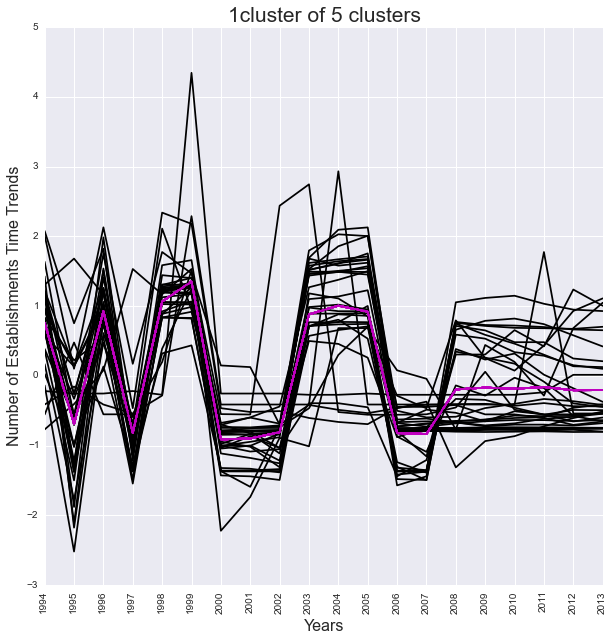

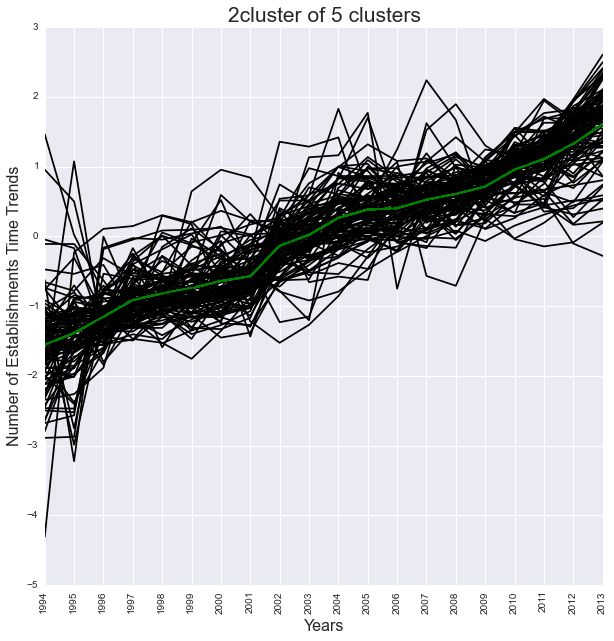

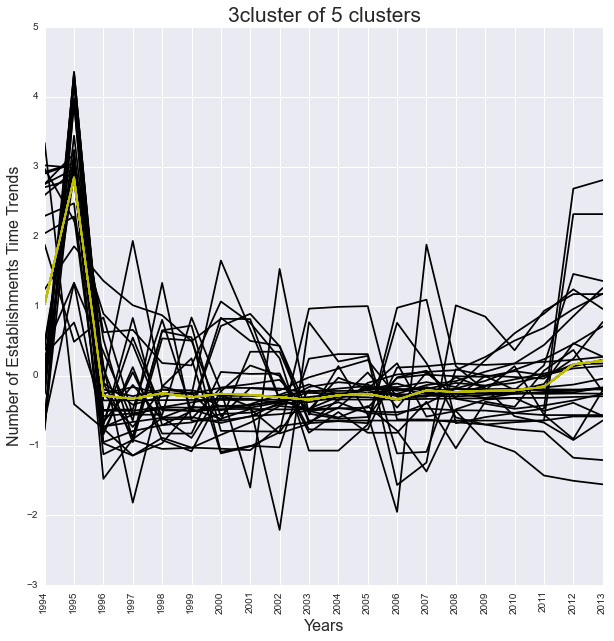

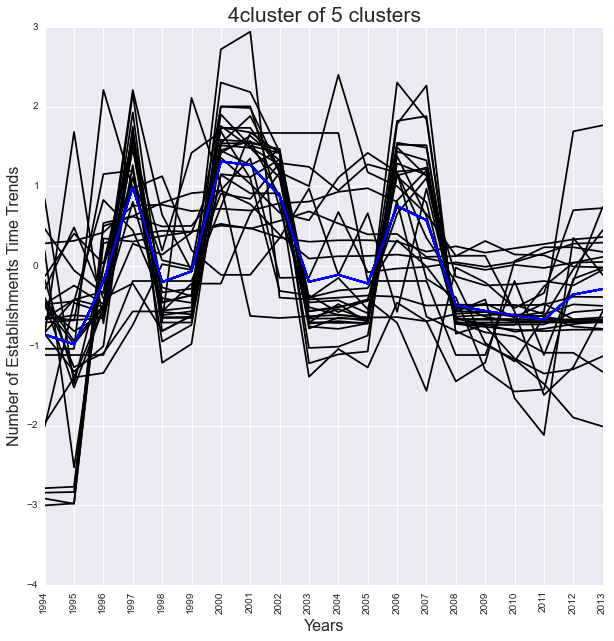

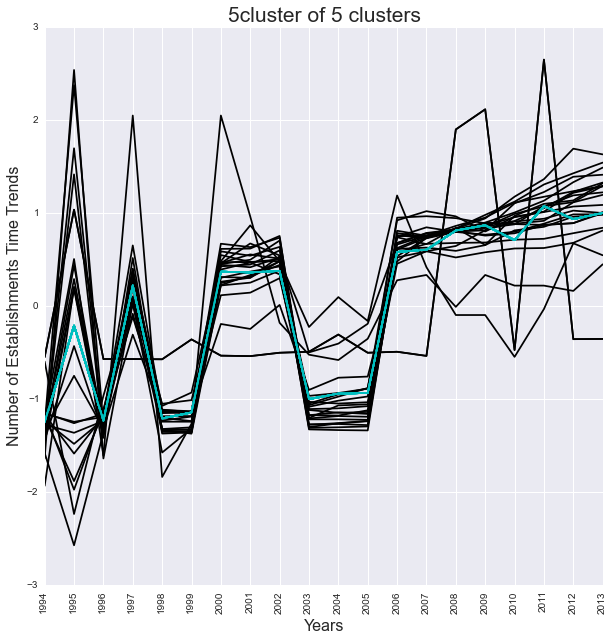

In [19]:
cl = cluster_array
with_zip['cluster'] = est[1]
col=['m','g','y','b','c']
c = k_means(cluster_array,n_clusters=5)
print c[1]
i = 0

for m in range(5):
    i = 0
    fig0 = plt.figure(figsize=(10,10));
    ax0 = fig0.add_subplot(1,1,1);
    plt.ylabel('Number of Establishments Time Trends', fontsize = 16)
    plt.xlabel('Years', fontsize = 16)
    plt.title(str(m+1)+'cluster of 5 clusters', fontsize = 21)
    plt.xticks(range(20), y, rotation = 90);
    for k in c[1]:
        
        
    
        if k==m:
        #print i 
            #name = 'ax'+str(m)
            #ax = globals[name]
            ax0.plot(range(20),cluster_array[i],c='k')
            ax0.plot(range(20),c[0][k],c=col[m])
        
#         ax0.legend()
        i = i+1
        


In [20]:
geodata['zip'] = geodata['postalCode'].astype(float)
hope = geodata.join(with_zip,rsuffix='zip',how='inner')

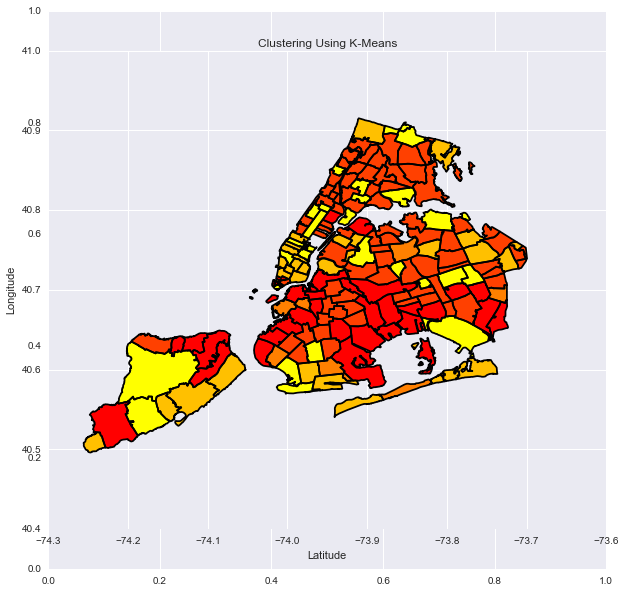

In [21]:
f, ax = plt.subplots(1, figsize=(10,10))
hope.plot(column='cluster', scheme='QUANTILES', alpha=1, colormap='autumn')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clustering Using K-Means')
#mplleaflet.display(crs =hope.crs)

In [22]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=5, compute_full_tree=True).fit(s)

In [23]:
with_zip['cluster2'] = agc.labels_

In [24]:
geodata1['zip'] = geodata1['postalCode'].astype(float)
hope2 = geodata1.join(with_zip,rsuffix='zip',how='inner')

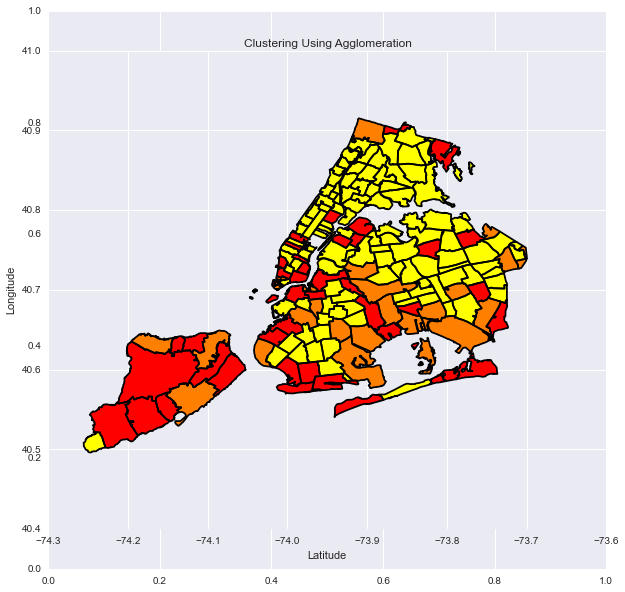

In [25]:
f, ax = plt.subplots(1, figsize=(10,10))
hope2.plot(column='cluster2', scheme='QUANTILES', alpha=1, colormap='autumn')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clustering Using Agglomeration')

In [28]:
newform = with_zip.join(geodata1,rsuffix='zip',how='inner')
newform.head()

,zip,cluster,cluster2,@id,BLDGpostalCode,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,Shape_Area,Shape_Leng,borough,geometry,postalCode,zipzip
0,11372,2,4,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,20163283.87440,20624.692317,Queens,POLYGON ((-73.86942457284175 40.74915687096787...,11372,11372
1,11004,2,4,http://nyc.pediacities.com/Resource/PostalCode...,0,081,2,Glen Oaks,NY,36,22606526.91390,23002.816039,Queens,POLYGON ((-73.71068374074007 40.75004039450917...,11004,11004
2,11040,2,2,http://nyc.pediacities.com/Resource/PostalCode...,0,081,3,New Hyde Park,NY,36,6269333.41234,15749.161511,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,11040,11040
3,11426,4,2,http://nyc.pediacities.com/Resource/PostalCode...,0,081,4,Bellerose,NY,36,49418364.05770,35932.810639,Queens,POLYGON ((-73.72270447144122 40.75373371438336...,11426,11426
4,11365,2,4,http://nyc.pediacities.com/Resource/PostalCode...,0,081,5,Fresh Meadows,NY,36,69385865.59430,38693.565676,Queens,POLYGON ((-73.81088634744755 40.72717187575918...,11365,11365


Now we can check the cluster number (which implies that we can check for trends from the previous cluster-trend plot)and zip codes, and make inferences.
#### Interpretation
On performing two clustering algorithms, namely K-Means and Agglomerative clustering , 
we observe that Brooklyn and Queens are the areas with steady increase in number of establishments.
While areas between queens and brooklyn as well as most of Staten Island have shown erratic behaviour but now are gradually increasing 
their no. of establishments.
While popular small parts of all boroughs exhibit a spike in 1994, while a sharp decrease in the later years, reaching a constant and then 
increasing slightly later in 2012.
While Staten island shows erratic behaviour in the initial years and subsequent increase in the later years- post 2005 due to 
Wall Street growth maybe.

Both the algorithms clustered in almost similar way, 
except that Long Island gets clustered in a different way, showing Long Island parks increasing establsihments in Agglomerative and erratic
trend in K-means.